In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import stats

In [2]:
gainPath = '/home/marteswong/CCD/CCD gain 3a (1)/'
gain_bias = 'bias_0_230915-164257.dat'

In [3]:
data_df = pd.read_csv(gainPath + gain_bias, delimiter=' ')
bias_array = np.array(data_df)[430:530, 590:690]
print(bias_array)
C_b = np.mean(bias_array)
var_b = np.std(bias_array) **2
print(C_b)
print(var_b)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.0769
0.07098639


In [4]:
# Compute the mean signal of ROI and variance from the bias-subtracted images
paper = np.arange(10)
mean = []
var = []
data_dec = np.zeros((100,100))
count = 0


for n in paper:
    data_df = pd.read_csv(gainPath + "{}_0.dat".format(n), delimiter=' ')
    data_array = np.array(data_df)[430:530, 590:690]
    for i in range(len(data_array)):
        for j in range(len(data_array[i])):
            t = data_array[i][j]
            d = int(str(t), base=16)
            data_dec[i][j] = d
    net_data_dec = np.subtract(data_dec, bias_array)
    # print(data_dec)
    # print(np.mean(data_dec))
    # print(np.mean(net_data_dec))
    # print(np.std(data_dec)**2)
    # print(np.std(net_data_dec)**2)
    # print()
    mean.append(np.mean(net_data_dec))
    var.append(np.std(net_data_dec)**2)
    count += 1

/tmp/ipykernel_6314/4055566613.py:10: DtypeWarning: Columns (0,1,2,3,6,7,9,11,12,13,19,20,23,24,25,26,31,35,38,39,44,45,52,59,121,691,743,763,803,825,864,894,895,899,904,913,918,929,933,935,938,941,949,953,972,974,975,984,987,994,1005,1007,1011,1013,1015,1020,1023,1030,1031,1034,1042,1044,1048,1049,1050,1053,1054,1056,1058,1060,1062,1067,1068,1069,1071,1072,1074,1077,1078,1079,1084,1085,1088,1090,1095,1097,1103,1109,1111,1112,1113,1120,1121,1122,1124,1130,1133,1135,1136,1138,1139,1140,1142,1146,1147,1149,1154,1156,1158,1159,1161,1162,1165,1166,1168,1170,1175,1177,1178,1181,1184,1188,1190,1191,1192,1193,1196,1199,1206,1208,1209,1212,1213,1214,1215,1216,1217,1218,1220,1221,1224,1228,1230,1235,1240,1245,1247,1250,1251,1262,1263,1265,1271,1272) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(gainPath + "{}_0.dat".format(n), delimiter=' ')
/tmp/ipykernel_6314/4055566613.py:10: DtypeWarning: Columns (509,567,581,595,605,615,621,622,627,628,64

In [5]:
slope, intercept, r_value, p_value, std_err = stats.linregress(var[1:], mean[1:])
res = stats.linregress(var[1:], mean[1:])

x = [0.55637744, 2.1152877499999994]
y = [x[0]*slope+intercept, x[1]*slope + intercept]

In [6]:
print(var[1:])
print(mean[1:])

# fitting results from linear regression
print(slope)   # 29.81636344444888
print(intercept)   # -7.812915103009779
print(std_err)   # 0.23174500095002962
print(res.intercept_stderr)  # 0.25990071169504547

[2.1152877499999994, 1.5617897600000006, 1.1708597500000006, 0.8722289599999999, 0.8152677499999998, 0.7242942399999999, 0.6631167599999997, 0.57954951, 0.55637744]
[54.9715, 38.9968, 27.4405, 18.6348, 15.9115, 13.7524, 12.0518, 9.3757, 8.6484]
29.81636344444888
-7.812915103009779
0.23174500095002962
0.25990071169504547


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


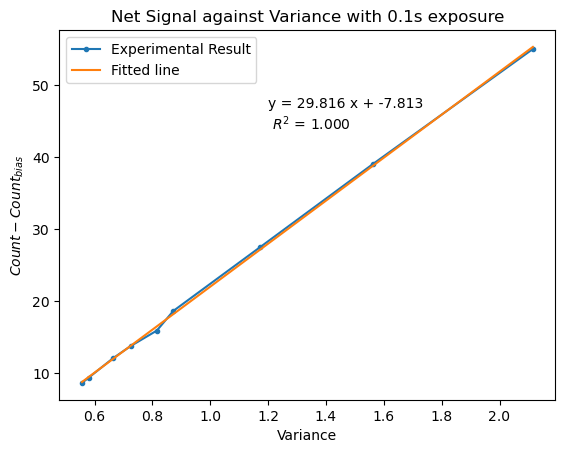

In [7]:
# Overplot the experimental data with the fitted line
# Display the equation obtained from linear regression on the plot
plt.plot(var[1:], mean[1:], marker = ".", label = "Experimental Result")
plt.plot(x, y, label = 'Fitted line')
plt.title("Net Signal against Variance with 0.1s exposure")
plt.xlabel("Variance")
plt.ylabel("$Count-Count_{bias}$")
plt.legend()

plt.text(1.2,43.8,"y = {:.3f} x + {:.3f}\n $R^2$ = {:.3f}".format(slope, intercept, r_value**2))
plt.savefig(gainPath + "SignalvsVariance.eps")